# Downsample

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import corner

downsample_factor = 10

names_list = ["GW170817_TaylorF2",
              "GW170817_NRTidalv2",
              "GW190425_TaylorF2",
              "GW190425_NRTidalv2"]

for name in names_list:
    path = f"../{name}/outdir/results_production.npz"
    
    # Load the data
    data = np.load(path)
    chains = data['chains']
    log_prob = data['log_prob']
    
    print(np.shape(chains))
    print(np.shape(log_prob))
    
    chains = chains.reshape((-1, chains.shape[-1]))
    log_prob = log_prob.reshape((-1, log_prob.shape[-1]))
    
    # Downsample
    chains = chains[::downsample_factor]
    log_prob = log_prob[::downsample_factor]
    
    print(np.shape(chains))
    print(np.shape(log_prob))
    
    # Save to new file
    np.savez(f"./{name}_downsampled.npz", chains=chains, log_prob=log_prob)

(1000, 220, 13)
(1000, 220)
(22000, 13)
(100, 220)
(1000, 220, 13)
(1000, 220)
(22000, 13)
(100, 220)
(1000, 600, 13)
(1000, 600)
(60000, 13)
(100, 600)
(1000, 600, 13)
(1000, 600)
(60000, 13)
(100, 600)


# Load again

np.shape(chains)
(22000, 13)


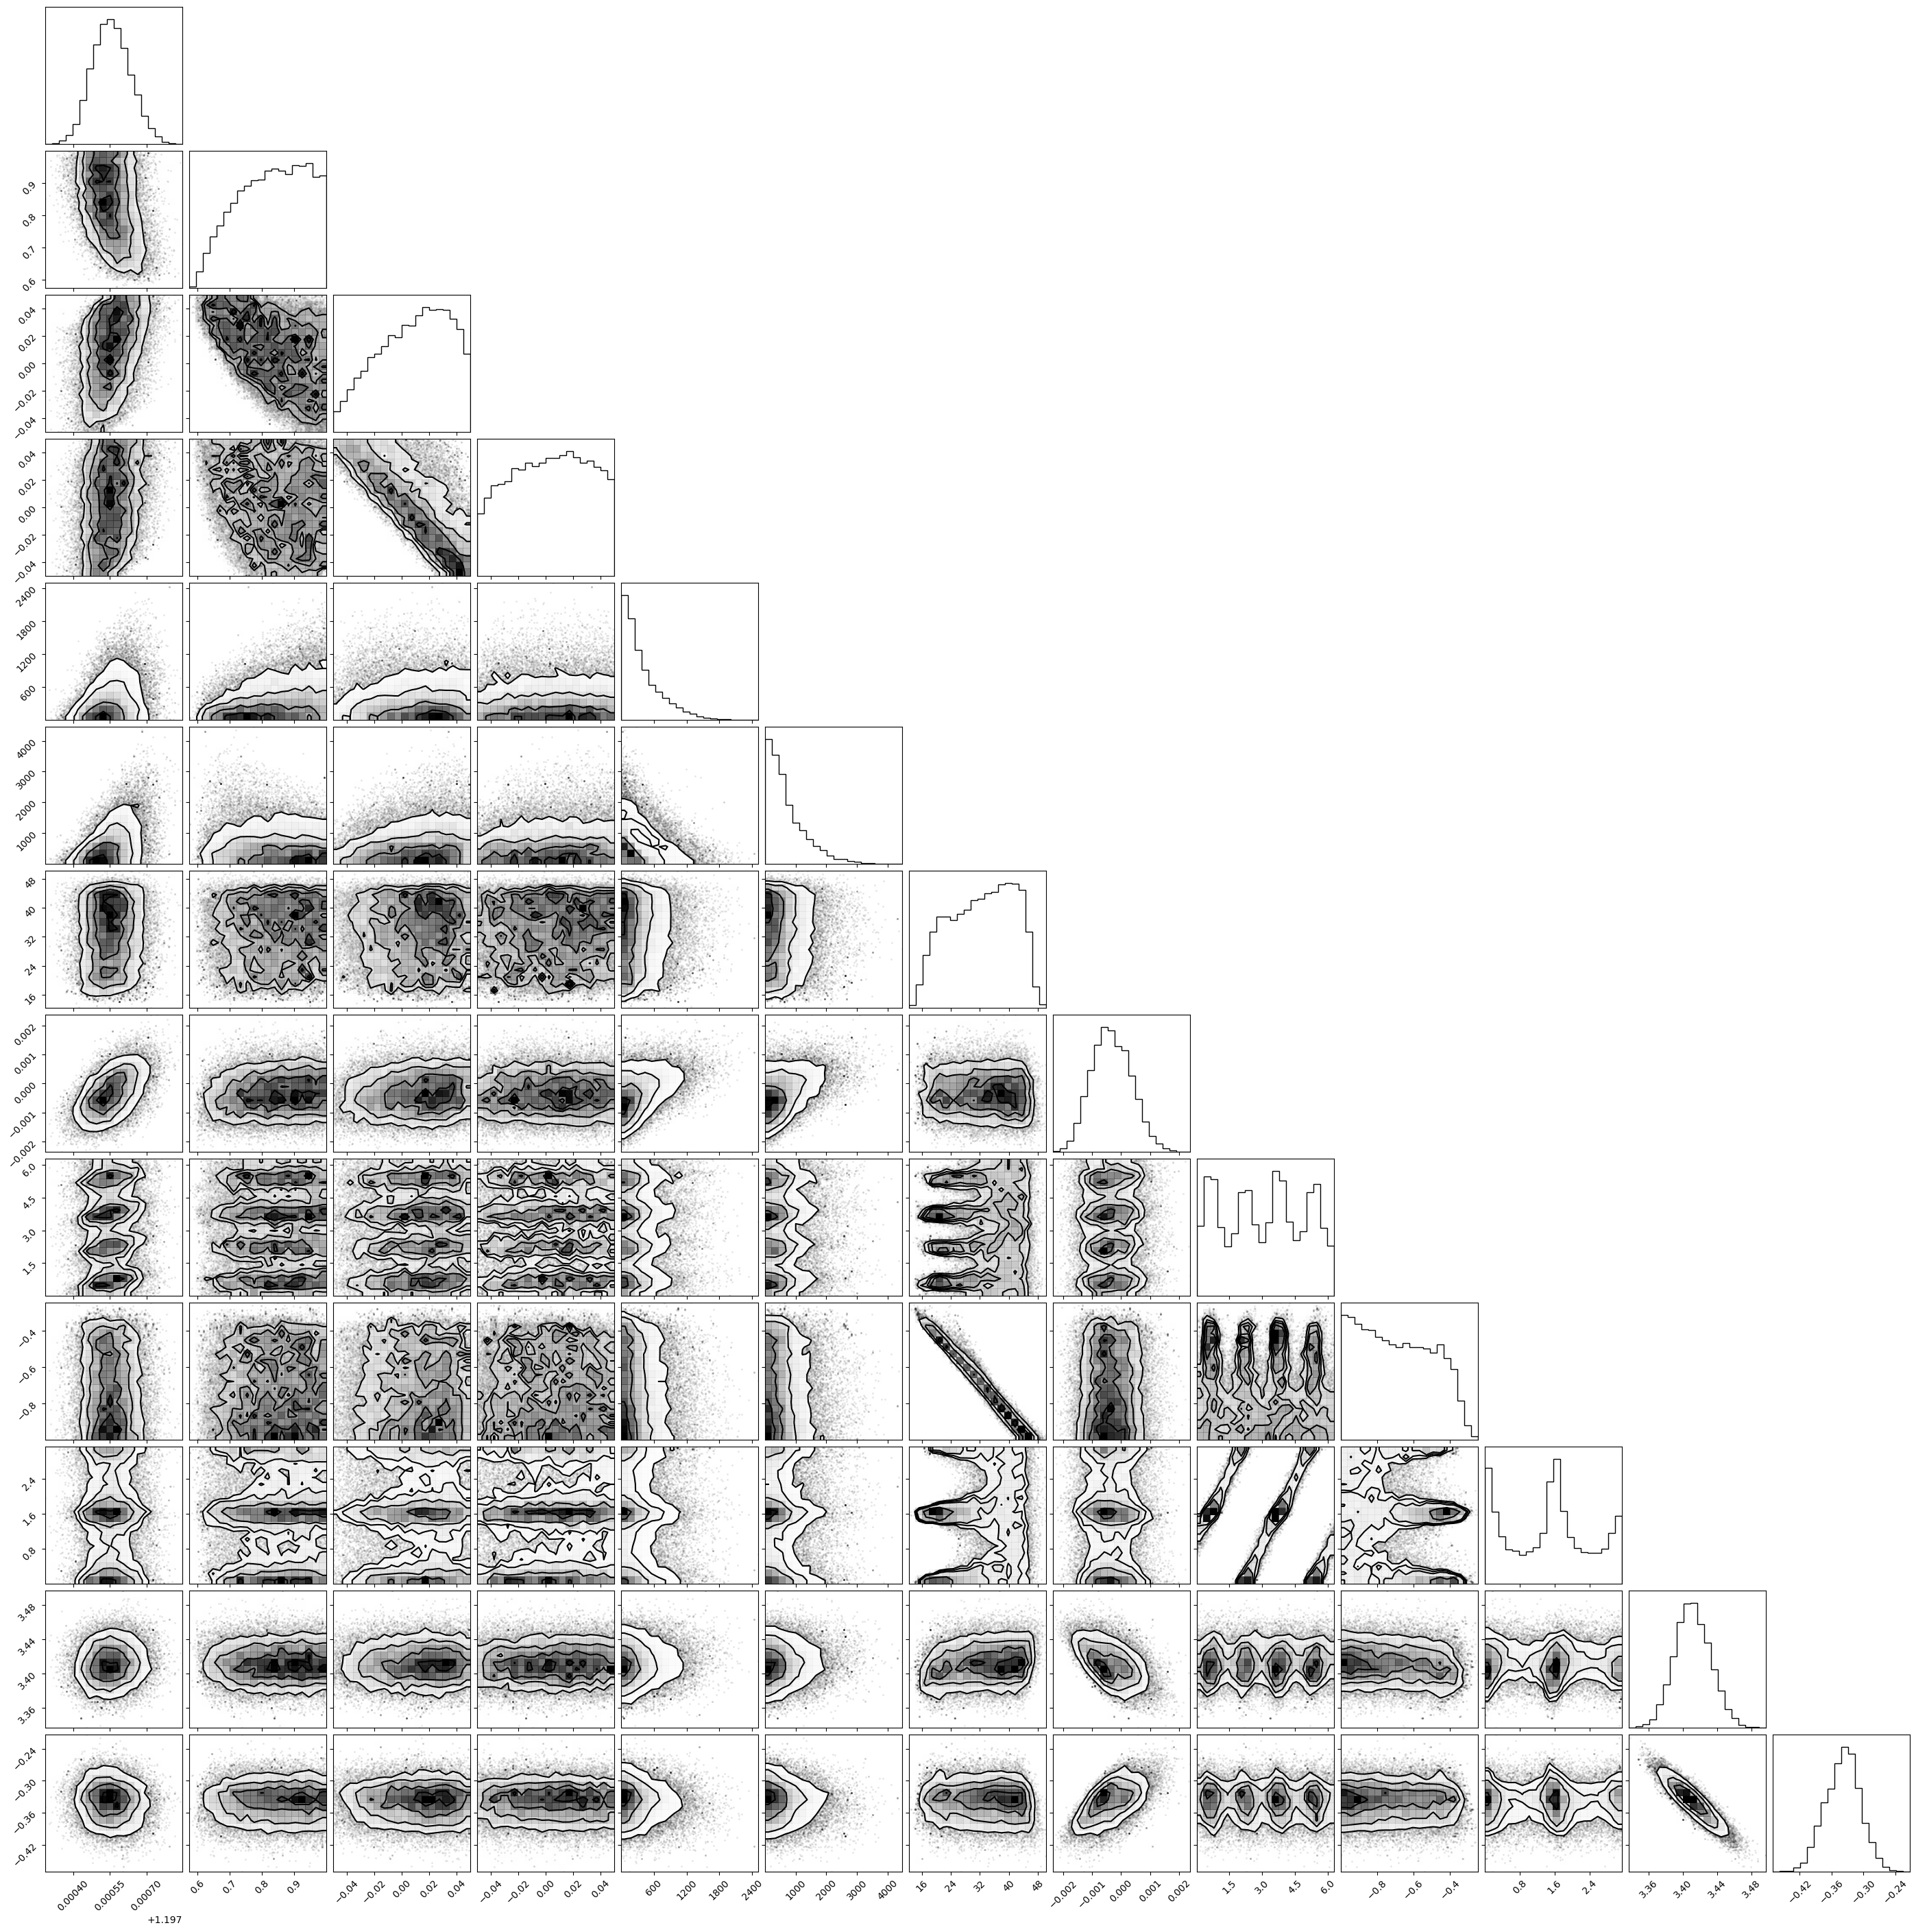

np.shape(chains)
(22000, 13)


In [18]:
for name in names_list:
    path = f"./{name}_downsampled.npz"
    
    # Load the data
    data = np.load(path)
    chains = data['chains']
    log_prob = data['log_prob']
    
    print("np.shape(chains)")
    print(np.shape(chains))
    
    # Test with corner if OK
    
    fig = corner.corner(chains)
    plt.show()
    plt.close()